In [1]:
from utils import *
import pandas as pd
import numpy as np
from trader import KalmanFilter

In [2]:
cnt_train = load_product('train', 'COCONUTS', 3)
pnc_train = load_product('train', 'PINA_COLADAS', 3)
cnt_val = load_product('val', 'COCONUTS', 3)
pnc_val = load_product('val', 'PINA_COLADAS', 3)

In [3]:
val = pd.concat((cnt_val['mid_price'], pnc_val['mid_price']), axis=1)
val.columns = ['cnt', 'pnc']
val.head()

,cnt,pnc
timestamp,,
0,7924.0,14851.5
100,7925.5,14854.5
200,7925.0,14854.5
300,7926.5,14859.5
400,7925.5,14856.5


In [4]:
X = np.hstack((cnt_train['mid_price'].to_numpy().reshape(-1, 1), np.ones((cnt_train['mid_price'].shape[0], 1))))
Y = pnc_train['mid_price'].to_numpy().reshape(-1, 1)
params = np.linalg.inv(X.T @ X) @ X.T @ Y
params = params.flatten()

In [10]:
params

array([1.54915342e+00, 2.61527230e+03])

In [5]:
val['spread'] = val['pnc'] - params[0] * val['cnt'] - params[1]

In [21]:
val['std'] = val['spread'].rolling(200).std()
val['zscore'] = (val['spread']) / val['std']

<AxesSubplot:xlabel='timestamp'>

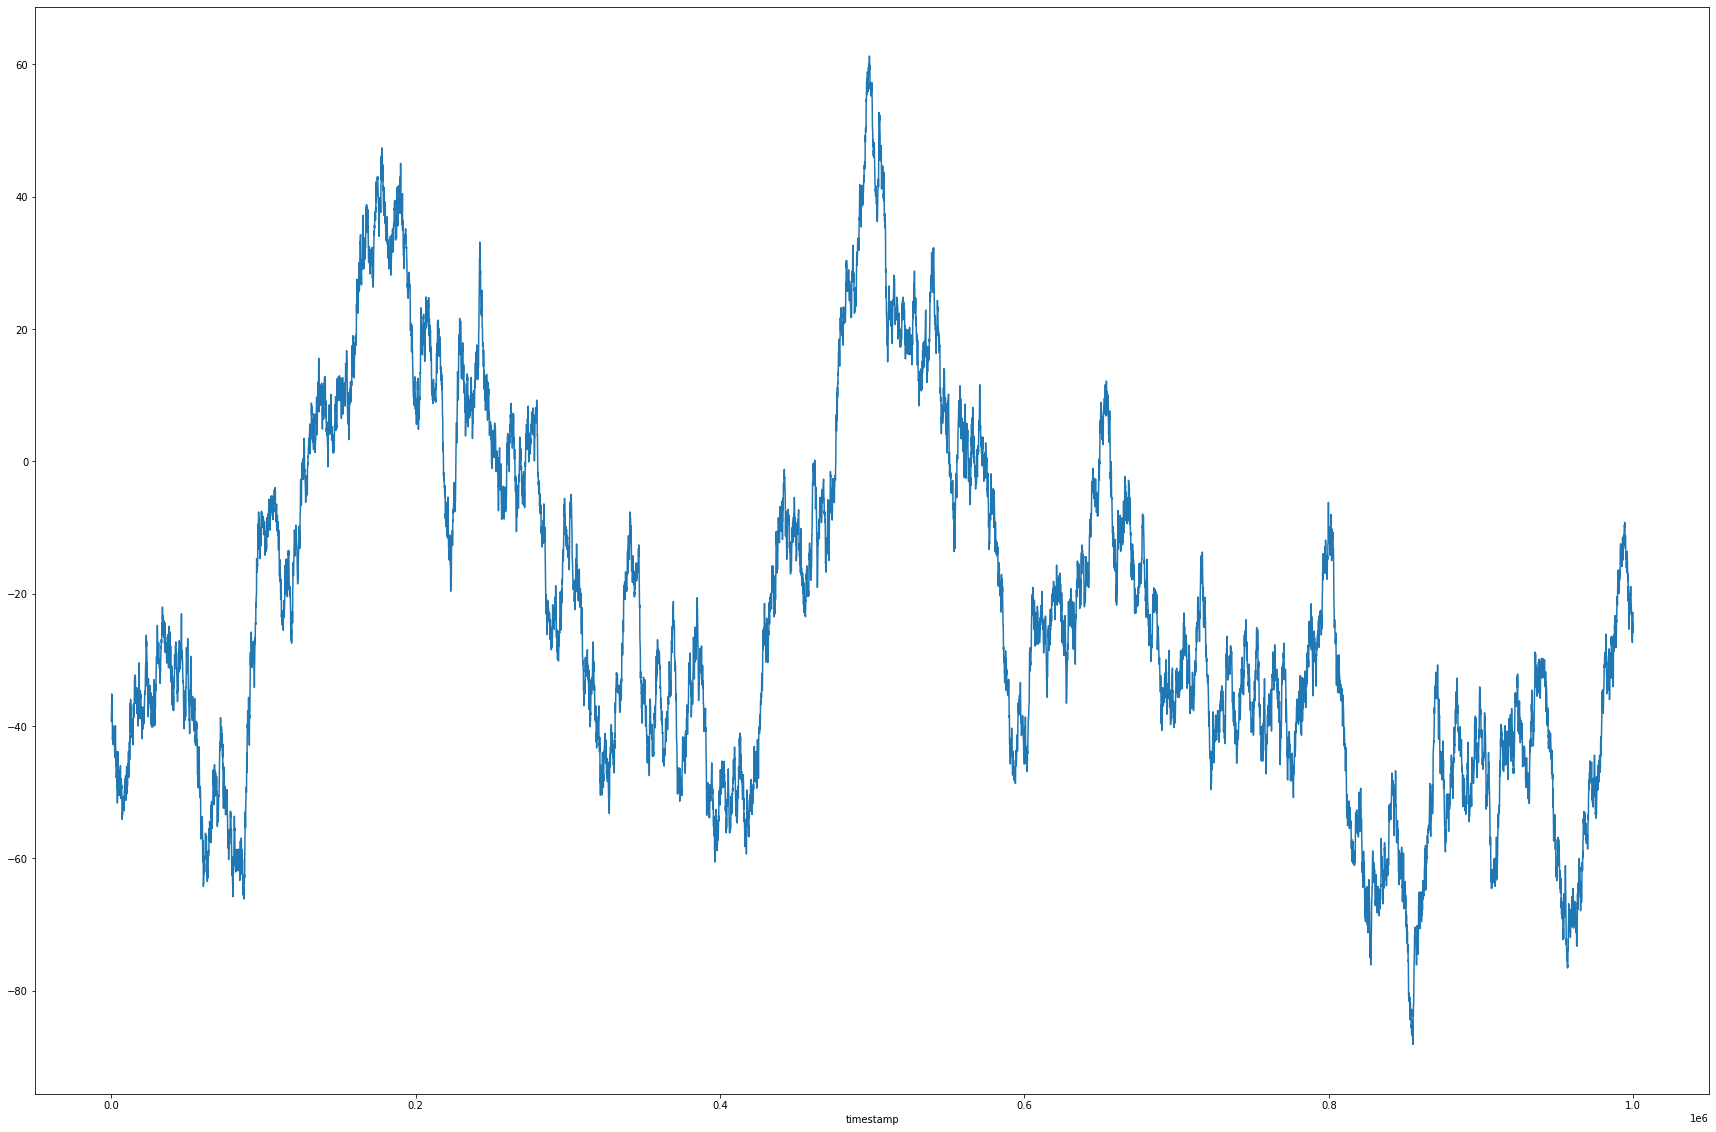

In [19]:
val['spread'].plot(figsize=(30, 20))

In [25]:
np.mean(val['spread'])

-21.964412712281728

In [23]:
train_spread = pnc_train['mid_price'] - params[0] * cnt_train['mid_price'] - params[1]

<AxesSubplot:xlabel='timestamp'>

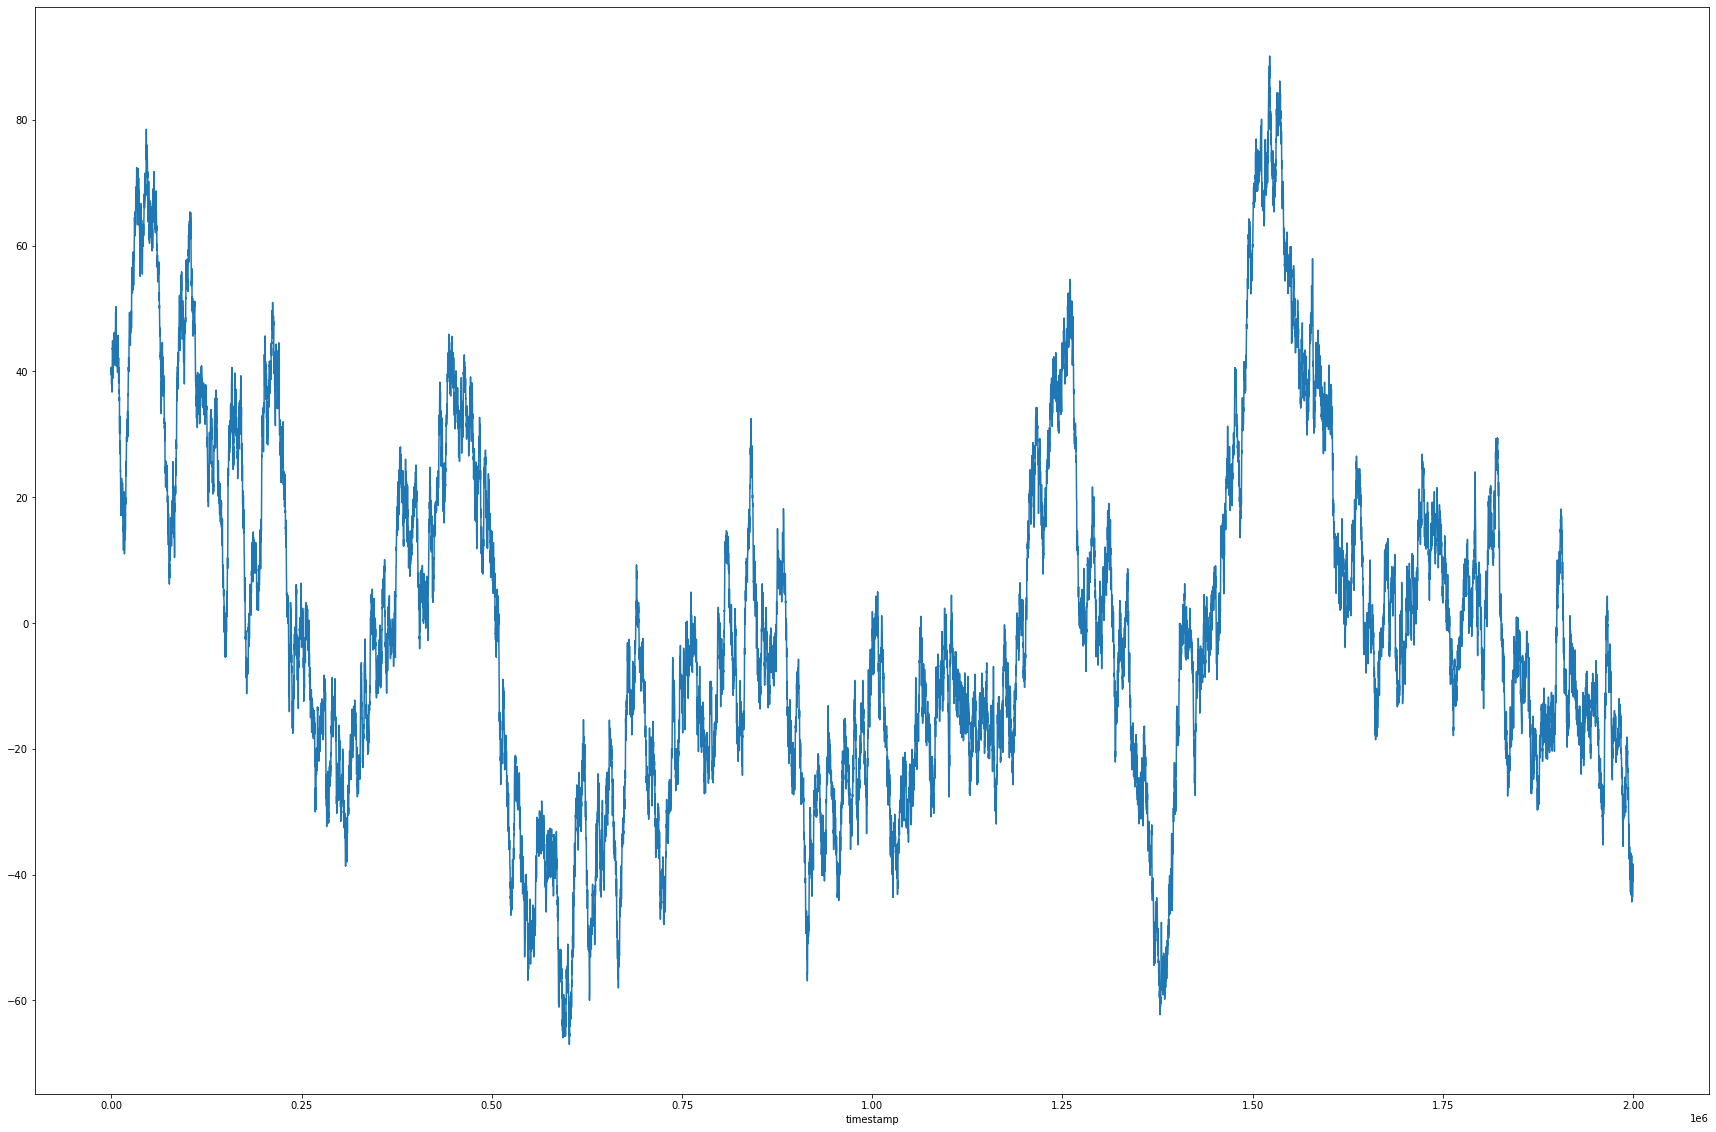

In [24]:
train_spread.plot(figsize=(30, 20))

In [26]:
params

array([1.54915342e+00, 2.61527230e+03])